In [66]:
import pandas as pd

In [67]:
from google.colab import drive
drive.mount('/content/drive')

# Replace with your actual file path
file_path = '/content/drive/My Drive/Python/data.xlsx'

# Read the Excel file
data = pd.read_excel(file_path)

# Now we drop Referance column
data=data.drop(columns=['Reference'])

# Show the content
display(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Density (Kg/m3),Time (hr),Surface temperature (oC),Fluid temperature (oC),Fluid velocity (m/s),Equivalent diameter (m),Dissolved oxygen (ppmw),Fouling factor (m2 K/kW)
0,797.762,3.333333,202.67,87.0,0.56,0.0147,322.100741,0.0023
1,797.762,3.666667,202.67,87.0,0.56,0.0147,322.100741,0.0020
2,797.762,4.000000,203.00,85.5,0.56,0.0147,322.100741,0.0120
3,797.762,4.333333,204.33,85.0,0.56,0.0147,322.100741,0.0149
4,797.762,4.666667,205.00,85.0,0.56,0.0147,322.100741,0.0171


In [68]:
# First We remove our Result Data
X=data.drop(columns=['Fouling factor (m2 K/kW)'])

In [69]:
# and put into another array
y=data['Fouling factor (m2 K/kW)']

In [70]:
import numpy as np

In [71]:
from sklearn.preprocessing import StandardScaler
stand=StandardScaler()
X=stand.fit_transform(X)

# X is now standardized meaning each feature will have a mean of 0 and a standard deviation of 1.

In [72]:
from sklearn.model_selection import train_test_split
tx,vx,ty,vy=train_test_split(X,y,test_size=0.2,random_state=666,shuffle=True)

# traning_X , Test_X , Traning_y , Test_y

# This means that the sequence of random numbers generated will be the same every time you run the code with that same value.

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor as XGBR

In [74]:
df1=pd.DataFrame(columns=['yp'])

# Creat an empty pandas DataFrame and single column named 'yp'.

In [75]:
estimators = [
 ('rf', RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=666,oob_score=True)),
 ('bag', BaggingRegressor(n_estimators=10,oob_score=True,n_jobs=-1,random_state=666)),
 ('gbm',XGBR(n_estimators=100,gamma=0.6,n_jobs=-1,max_depth=6,learning_rate=0.01,subsample=1))
]

In [76]:
reg = StackingRegressor(estimators=estimators,final_estimator=LinearSVR(),cv=5)

# this code sets up a stacking model where the predictions from a Random Forest, Bagging Regressor,
#                       and XGBoost model are combined by a Linear SVR to produce the final output.

In [77]:
reg.fit(tx, ty)
yp=reg.predict(vx)
df1['yp']=yp

# train your stacking model using the training data and then use that trained model to generate predictions on your unseen test data,
#                        storing those predictions in a DataFrame.

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:1315: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:1315: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:1315: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:1315: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:1315: UserWarning: Some inputs do not have OOB scor

In [78]:
m=[]
mae=[]
mse=[]
r2=[]
rae=[]
mape=[]
p25=[]
p05=[]
p75=[]
p2=[]
p4=[]
plog=[]
pexp=[]
psin=[]
ptan=[]

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
MAE=mean_absolute_error(vy,yp)

MSE=mean_squared_error(vy,yp)

R2=r2_score(vy,yp)

errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE= np.mean(errors) / mean_true

MAPE= mean_absolute_percentage_error(vy,yp)

mae.append(MAE)
mse.append(MSE)
r2.append(R2)
rae.append(RAE)
mape.append(MAPE)

In [80]:
df2=pd.DataFrame({'MAE':mae,'MSE':mse,'R2':r2,'RAE':rae,'MAPE':mape})

In [81]:
df2

,MAE,MSE,R2,RAE,MAPE
0,0.00447,0.000138,0.996073,0.029196,0.148836


In [82]:
import matplotlib.pyplot as plt

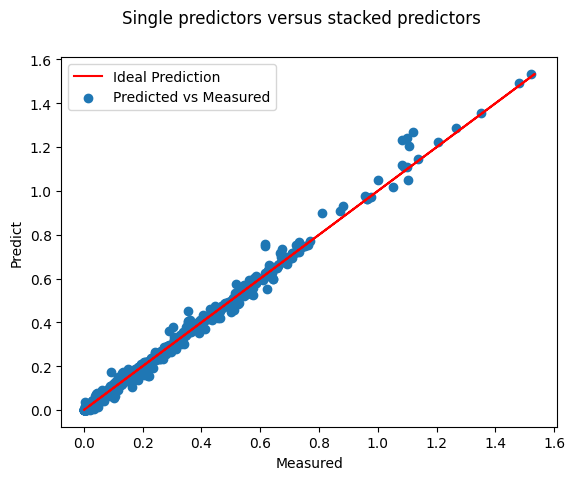

In [83]:
plt.plot(vy,vy,'r', label='Ideal Prediction')
plt.scatter(yp,vy, label='Predicted vs Measured')
plt.xlabel('Measured')
plt.ylabel('Predict')
plt.suptitle('Single predictors versus stacked predictors')
plt.legend()
plt.show()

In [84]:
# X-axis ('Measured'): This represents the actual, measured values of the 'Fouling factor (m2 K/kW)' from our test dataset (vy).

# Y-axis ('Predict'): This represents the values of the 'Fouling factor' that your stacking regression model predicted for the corresponding
#      data points in the test set (yp).

# Red Line ('Ideal Prediction'): This diagonal red line represents the ideal scenario where the predicted value is exactly equal to the
#      measured value. If all your predicted points fell on this line, it would indicatea perfect model.

# Blue Dots ('Predicted vs Measured'): Each blue dot on the plot represents a single data point from your test set. Its position is determined
#       by its actual measured value on the x-axis and the model's predicted value forthat point on the y-axis.